In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from scipy.ndimage import gaussian_filter

In [9]:
def stokes_psi(Q, U):
    """
    Returns the psi angular map derived from the 
    Stokes parameter Q and U
    
    @type Q: numpy array
    @type U: numpy array
    """
    return np.arctan2(U, Q)/2


def Imshow(array, title='',**kwargs):
    """
    Displays and Image data using matplotlib.
    
    @type array: numpy array
    """
    plt.figure(figsize = (7, 7))
    plt.title(title)
    plt.imshow(array)
    plt.colorbar()
    plt.show()
    
    
def Histshow(array, title='', **kwargs):
    """
    Show a histogram of the corresponding data array.
    
    @type array: numpy array
    @type title: String
    """
    plt.figure()
    plt.title(title)
    plt.hist(array, bins = 100)
    plt.show()
    
    
def get_basic_stats(array):
    """
    Prints some basic statistics about the data array.
    
    @type array: Numpy array
    @rtype: List[Floats]
    """
    mean, median, std = np.mean(array), np.median(array), np.std(array)
    return [mean, median, std]


def Imsave(array, title, loc=''):
    """
    Saves the newly generated fits file into the desired 
    location. Default is current working directory.
    
    @type array: Numpy array
    @type title: String
    @type loc: String
    @rtype: None
    """
    hdu = fits.PrimaryHDU(array)
    hdulist = fits.HDUList([hdu])
    if len(loc) > 0:
        try:
            os.chdir(loc)
        except:
            print("Invalid location")
    fits.writeto(title, array)
        

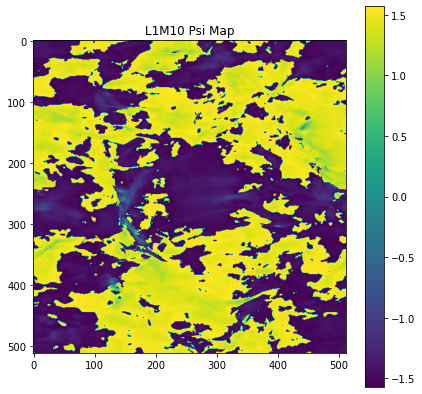

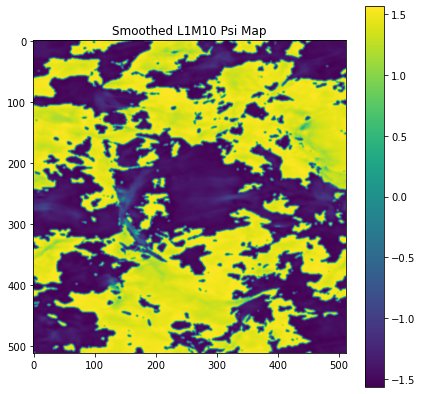

In [3]:
# Load some data here

L1M10_Q = fits.open("athena/L1M10_Q.fits")[0].data
L1M10_U = fits.open("athena/L1M10_U.fits")[0].data

# Imshow(L1M10_Q)
# Imshow(L1M10_U)

L1M10_psi = stokes_psi(L1M10_Q, L1M10_U)
Imshow(L1M10_psi, title='L1M10 Psi Map')

# What about applying Gaussian Filter? What is sigma's relation to resolution?

Imshow(gaussian_filter(L1M10_psi, sigma=2.5/2.35), title="Smoothed L1M10 Psi Map")

<h3>Smoothing to high standard deviation gets rid of sharp edges as desired</h3>


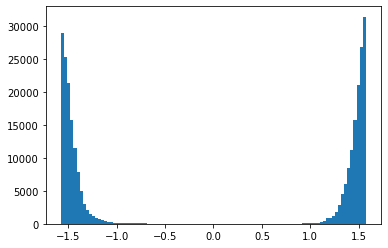

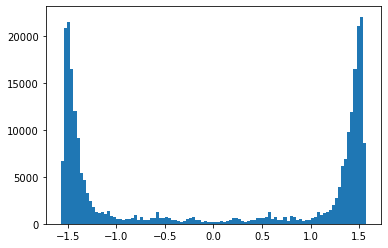

In [4]:
og = L1M10_psi
Histshow(og.flatten())

# Gaussian Filtered
gaussian_filter(L1M10_psi, sigma=10)
Histshow(gaussian_filter(L1M10_psi, sigma=2.5/2.35).flatten())

In [5]:
print("Original stats")
print("Mean, Median, Standard Deviation: ", get_basic_stats(L1M10_psi.flatten()))

print("\n Smoothed Stats")
print("Mean, Median, Standard Deviation: ", get_basic_stats(gaussian_filter(L1M10_psi, sigma=10).flatten()))

Original stats
Mean, Median, Standard Deviation:  [0.03816259593938268, 1.2176504781878341, 1.4700798445040812]

 Smoothed Stats
Mean, Median, Standard Deviation:  [0.0381625959393827, 0.08480979334421661, 0.9604325360557576]


In [6]:
# Get Image size
# 512 by 512

simulation_box_size = 10 # parsecs
x_length = np.shape(L1M10_psi)[0]

pixel_size = simulation_box_size / x_length

W = 2.5 #arcminutes 

beam_size = 0.65 / pixel_size #Our desired smoothing length
print(beam_size)

33.28


Lets try smoothing with our beam size value.

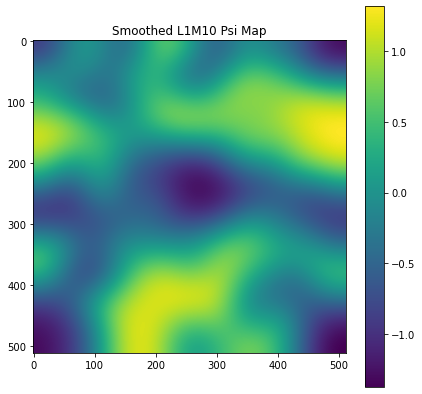

In [7]:
smoothed_image = gaussian_filter(L1M10_psi, sigma=33.28)

Imshow(smoothed_image, title="Smoothed L1M10 Psi Map")

Save the newly resolved image

In [11]:
Imsave(array=smoothed_image, title='L1M10_065.fits')

Show that we saved the smoothed image correctly.

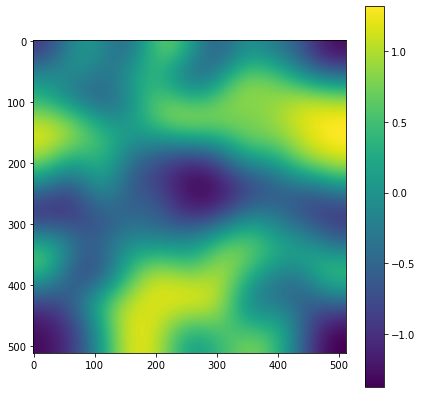

In [14]:
test = fits.open("L1M10_065.fits")[0].data
Imshow(test)